# Example 6: Mean infall velocity into cluster BCGs

In this example we'll show how to calculate the mean infall velocity of galaxies towards the cluster BCGs. 

## Generate a mock galaxy catalog 

Let's start out by generating a mock galaxy catalog into an N-body
simulation in the usual way. Here we'll assume you have the z=0
rockstar halos for the bolshoi simulation, as this is the
default halo catalog. 


In [1]:
from halotools.empirical_models import PrebuiltSubhaloModelFactory
model = PrebuiltSubhaloModelFactory('smhm_binary_sfr')

from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='multidark', redshift=0, halo_finder='rockstar')
model.populate_mock(halocat)


Our mock galaxies are stored in the ``galaxy_table`` of ``model.mock``
in the form of an Astropy Table.


## Extract the position and velocity coordinates

In [2]:
from halotools.mock_observables import return_xyz_formatted_array, mean_radial_velocity_vs_r

In [15]:
cluster_central_mask = (model.mock.galaxy_table['stellar_mass'] > 10**11.5)
cluster_centrals = model.mock.galaxy_table[cluster_central_mask]

low_mass_tracers_mask = ((model.mock.galaxy_table['stellar_mass'] > 10**10) & 
                         (model.mock.galaxy_table['stellar_mass'] < 10**10.5))
low_mass_tracers = model.mock.galaxy_table[low_mass_tracers_mask]


In [16]:
cluster_pos = return_xyz_formatted_array(cluster_centrals['x'], cluster_centrals['y'] ,cluster_centrals['z'])
cluster_vel = return_xyz_formatted_array(cluster_centrals['vx'], cluster_centrals['vy'] ,cluster_centrals['vz'])

low_mass_tracers_pos = return_xyz_formatted_array(low_mass_tracers['x'], low_mass_tracers['y'] ,low_mass_tracers['z'])
low_mass_tracers_vel = return_xyz_formatted_array(low_mass_tracers['vx'], low_mass_tracers['vy'] ,low_mass_tracers['vz'])



## Calculate $<V_{\rm rad}>(r)$

In [17]:
rbins = np.logspace(-0.5, 1.25, 15)
rbin_midpoints = (rbins[1:] + rbins[:-1])/2.

vr_clusters = mean_radial_velocity_vs_r(cluster_pos, cluster_vel, rbins_absolute=rbins, 
                                      sample2=low_mass_tracers_pos, velocities2=low_mass_tracers_vel, 
                                      period = model.mock.Lbox)

### Plot the result

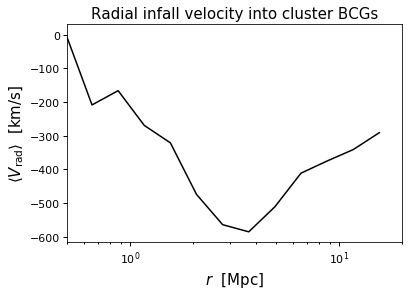

In [21]:
%matplotlib inline

fig, ax = plt.subplots(1, 1)

__=ax.plot(rbin_midpoints, vr_clusters, color='k')
xscale = ax.set_xscale('log')

xlim = ax.set_xlim(xmin=0.5, xmax=20)

xlabel = ax.set_xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle V_{\rm rad}\rangle$  $[{\rm km/s}]$', fontsize=15)
title = ax.set_title('Radial infall velocity into cluster BCGs', fontsize=15)

fig.savefig('cluster_bcg_infall_velocity.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')
